In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [99]:
data=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\IBM\abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   Wholeweight    4177 non-null   float64
 5   Shuckedweight  4177 non-null   float64
 6   Visceraweight  4177 non-null   float64
 7   Shellweight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [101]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole weight','Shucked weight':'Shucked_weight','Shucked_weight':'Viscera_weight',
                          'Shell weight':'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Wholeweight,Shuckedweight,Visceraweight,Shellweight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


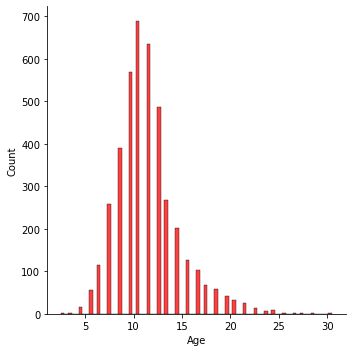

In [102]:
sns.displot(data["Age"],color='red')

<AxesSubplot:xlabel='Count', ylabel='Sex'>

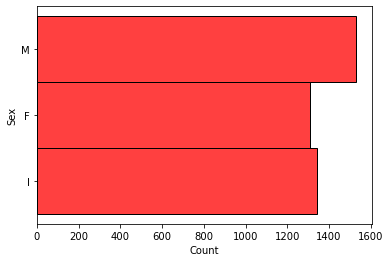

In [28]:
sns.histplot(y=data.Sex,color='red')

<AxesSubplot:xlabel='Height', ylabel='Count'>

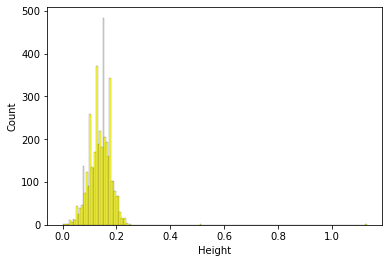

In [27]:
sns.histplot(x=data.Height,color='yellow')

<AxesSubplot:xlabel='Age'>

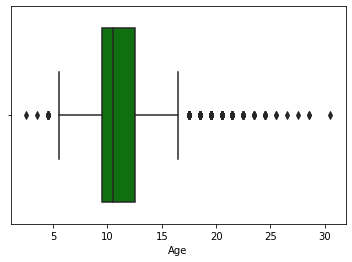

In [29]:
sns.boxplot(x=data.Age,color='green')

<AxesSubplot:xlabel='Age', ylabel='count'>

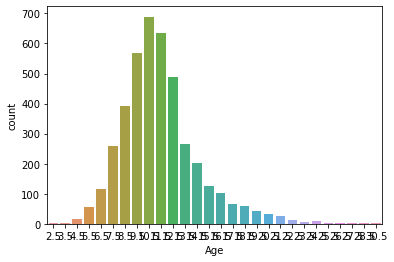

In [30]:
sns.countplot(x=data.Age)

<AxesSubplot:xlabel='Height', ylabel='Age'>

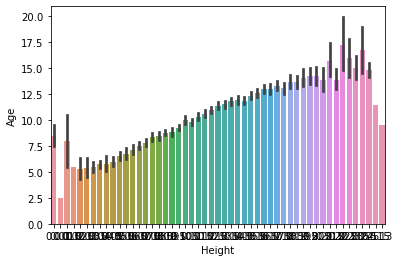

In [31]:
sns.barplot(x=data.Height,y=data.Age)

<AxesSubplot:xlabel='Sex', ylabel='Height'>

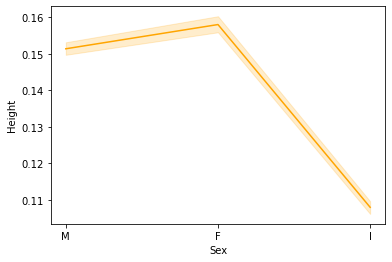

In [36]:
sns.lineplot(x=data.Sex,y=data.Height, color='orange')

<AxesSubplot:xlabel='Age', ylabel='Height'>

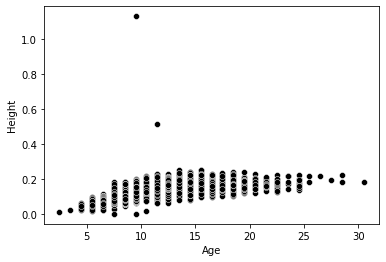

In [42]:
sns.scatterplot(x=data.Age,y=data.Height,color='black')

<AxesSubplot:xlabel='Sex', ylabel='Height'>

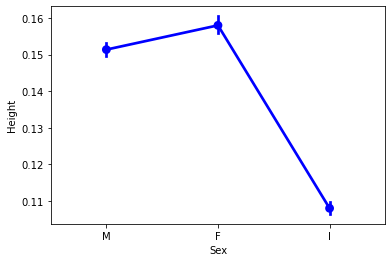

In [43]:
sns.pointplot(x=data.Sex,y=data.Height,color='blue')

<AxesSubplot:xlabel='Age', ylabel='Height'>

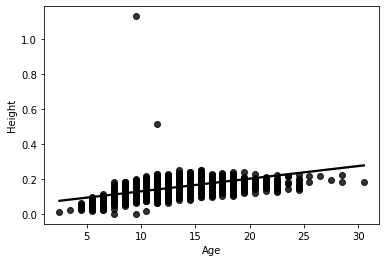

In [48]:
sns.regplot(x=data.Age,y=data.Height,color='black')

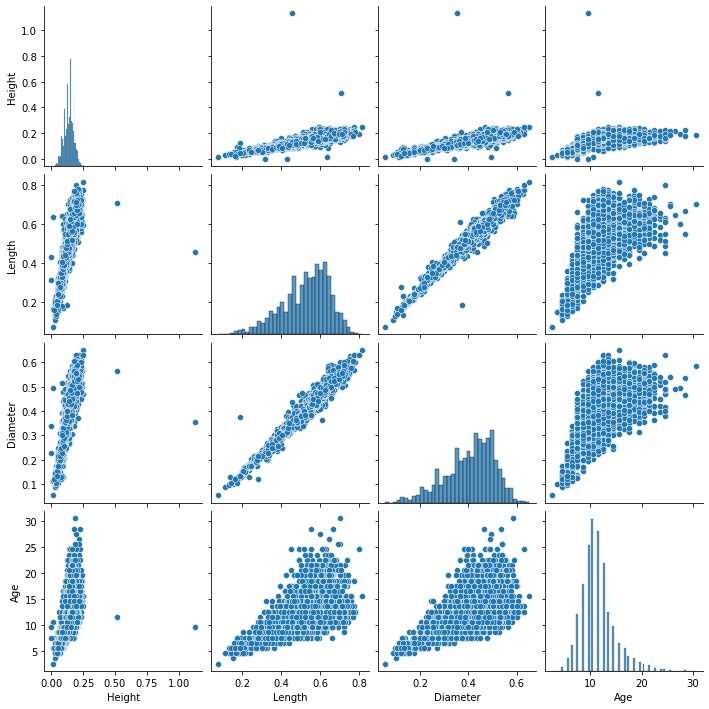

In [105]:
sns.pairplot(data=data[["Height","Length","Diameter","Age"]])

In [98]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.444577
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.204419
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,5.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [59]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked_weight    0
Viscera weight    0
Shell_weight      0
Age               0
dtype: int64

In [61]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [63]:
a=data.Age.quantile(0.25)
b=data.Age.quantile(0.75)
c=b-a
lower_limit=a-1.5*c
data.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked_weight     0.3360
Viscera weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

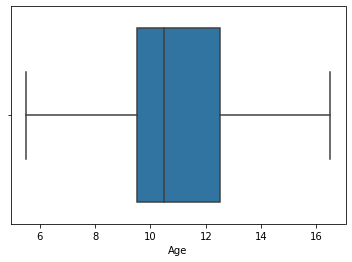

In [65]:
data['Age']=np.where(data['Age']<lower_limit,7,data['Age'])
sns.boxplot(x=data.Age,showfliers=False)

In [66]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [70]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [74]:
y=data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

In [72]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [75]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x),columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


In [76]:
from sklearn.model_selection import train_test_split
0X_Train,X_Test,Y_Train,Y_Test=train_test_split(X_Scaled,y,test_size=0.2,random_state=0)

In [77]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [78]:
Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [80]:
X_Train.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [81]:
Y_Train.head()

3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int32

In [82]:
Y_Test.head()

668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int32

In [83]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [84]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [86]:
y_predict=model.predict(X_Test)

In [87]:
y_predict_train=model.predict(X_Train)

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [90]:
print('Training accuracy:',accuracy_score(Y_Train,y_predict_train))

Training accuracy: 0.9799461239149955


In [92]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,112,31,106
1,37,216,38
2,123,58,115


In [93]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.41      0.45      0.43       249
           1       0.71      0.74      0.72       291
           2       0.44      0.39      0.41       296

    accuracy                           0.53       836
   macro avg       0.52      0.53      0.52       836
weighted avg       0.53      0.53      0.53       836

